In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import tensorflow as tf

In [25]:
df = pd.read_csv('/content/ACB.VN.csv')

In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,8533.238281,8619.142578,8447.333008,8590.507813,8254.484375,5164405.0
1,2019-03-04,8590.507813,8733.682617,8561.873047,8705.047852,8364.543945,10898750.0
2,2019-03-05,8705.047852,8790.953125,8619.142578,8676.413086,8337.029297,8611453.0
3,2019-03-06,8647.778320,8705.047852,8590.507813,8676.413086,8337.029297,11100248.0
4,2019-03-07,8705.047852,8790.953125,8676.413086,8733.682617,8392.058594,11530669.0
5,2019-03-08,8705.047852,8762.318359,8647.778320,8676.413086,8337.029297,4948093.0
6,2019-03-11,8676.413086,8762.318359,8647.778320,8705.047852,8364.543945,9866759.0
7,2019-03-12,8733.682617,8848.223633,8676.413086,8848.223633,8502.119141,8745639.0
8,2019-03-13,8905.493164,9077.303711,8848.223633,8991.398438,8639.694336,19114578.0
9,2019-03-14,8991.398438,9163.208008,8962.763672,9020.033203,8667.208984,8148129.0


In [58]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [59]:
# Min-max normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(df))

In [61]:
# Split the data into training, testing sets
split_index = int(len(df) * 0.8)  # 80% for training

In [62]:
train_data = df[:split_index]
test_data = df[split_index:]

In [63]:
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [65]:
# Define the model
def build_model(input_dim):
    model = Sequential()
    # Using a smaller standard deviation for the normal initializer
    model.add(Dense(1, input_dim=input_dim, kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), activation='linear'))
    # Increased learning rate
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    return model

X_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# Build and train the model
model = build_model(input_dim=1)
model.fit(X_train, y_train, epochs=100, verbose=0, batch_size=5)  # Reduced number of epochs and batch size

# Make predictions
y_pred = model.predict(X_test)
print("Predictions:", y_pred.flatten())

# Output the model summary to check the structure
print('---------Model summary----------')
model.summary()
model.get_weights()

8/8 [==============================] - 0s 2ms/step
Predictions: [17929.174 17947.156 17965.139 17983.121 18001.104 18019.086 18037.068
 18055.05  18073.033 18091.016 18108.998 18126.979 18144.96  18162.943
 18180.926 18198.908 18216.89  18234.873 18252.855 18270.838 18288.82
 18306.803 18324.785 18342.766 18360.748 18378.73  18396.713 18414.695
 18432.678 18450.66  18468.643 18486.625 18504.607 18522.59  18540.57
 18558.553 18576.535 18594.518 18612.5   18630.482 18648.465 18666.447
 18684.43  18702.412 18720.395 18738.377 18756.357 18774.34  18792.322
 18810.305 18828.287 18846.27  18864.252 18882.234 18900.217 18918.2
 18936.182 18954.162 18972.145 18990.127 19008.11  19026.092 19044.074
 19062.057 19080.04  19098.021 19116.004 19133.986 19151.967 19169.95
 19187.932 19205.914 19223.896 19241.879 19259.861 19277.844 19295.826
 19313.809 19331.791 19349.773 19367.754 19385.736 19403.719 19421.701
 19439.684 19457.666 19475.648 19493.63  19511.613 19529.596 19547.578
 19565.559 19583.5

[array([[17.98225]], dtype=float32), array([18.853582], dtype=float32)]

In [66]:
last_index = df.index[-1]

# Create arrays of consecutive integers for the next 30, 60, and 90 days
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)

# Use the predictions of the first 30 days to predict the next 30 days
x_next_60_days = np.array(range(last_index + 31, last_index + 61)).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)

# Use the predictions of the first 60 days to predict the next 30 days
x_next_90_days = np.array(range(last_index + 61, last_index + 91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)


1/1 [==============================] - 0s 22ms/step


In [69]:
from sklearn.metrics import mean_absolute_error

# Calculating test metrics
mape_test = mean_absolute_percentage_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
msle_test = mean_squared_log_error(y_test, y_pred)

# Print result
print('---------TEST----------')
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print("MSLE:", round(msle_test, 3))
print('-------------------')

---------TEST----------
MAPE: 0.042
MAE: 838.479
RMSE: 1083.977
MSLE: 0.003
-------------------


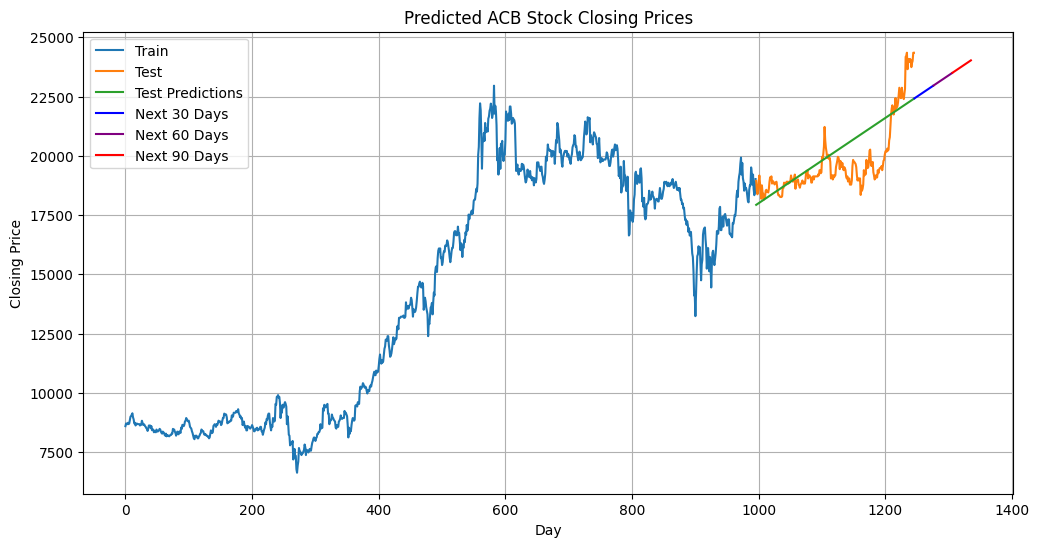

In [70]:
plt.figure(figsize=(12,6))

# Plot the train, test, and validation data
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')

# Plot the predictions for test and validation sets
plt.plot(test_data.index, y_pred, label='Test Predictions')

# Plot the predictions for the next 30, 60, and 90 days
plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next 30 Days', color='blue')
plt.plot(range(last_index + 31, last_index + 61), y_next_60_days, label='Next 60 Days', color='purple')
plt.plot(range(last_index + 61, last_index + 91), y_next_90_days, label='Next 90 Days', color='red')


# Adding titles and labels
plt.title('Predicted ACB Stock Closing Prices')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()